In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import reciprocal
from reciprocal.kspace import KSpace
from reciprocal.canvas import Canvas
from reciprocal.lattice import LatticeVectors, Lattice
from reciprocal.kvector import KVectorGroup
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Circle
import matplotlib.cm as cm

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['image.cmap']='plasma'



In [3]:
def get_lattice_vectors(shape):
    if shape == 'square':
        return LatticeVectors.from_lengths_angle(1.0,1.0, 90.)
    elif shape == 'rectangle':
        return LatticeVectors.from_lengths_angle(1.5,1.0, 90.)
    elif shape == 'hexagon':
        return LatticeVectors.from_lengths_angle(1.0,1.0, 60.)
    elif shape == 'oblique':
        return LatticeVectors.from_lengths_angle(1.0,1.0, 75.)
    
def get_symmetry(shape):
    if shape == 'square':
        return 'SIGMA_V'
    elif shape == 'rectangle':
        return 'D2'
    elif shape == 'hexagon':
        return 'D6'
    elif shape == 'oblique':
        return 'C2'

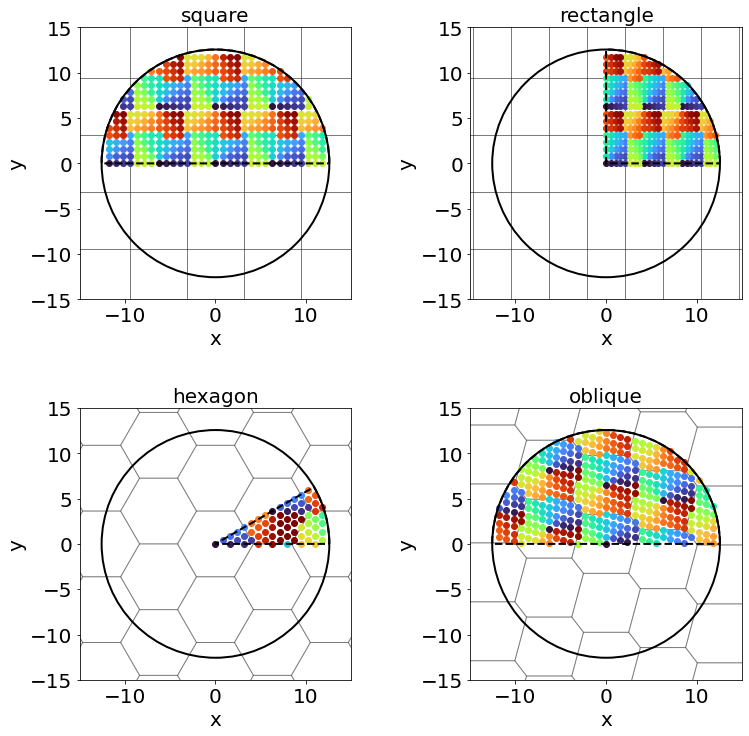

In [4]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    wvl = 0.5
    k0 = 2*np.pi/wvl
    kspace = KSpace(wvl, symmetry=get_symmetry(lat_shape), fermi_radius=k0)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    kspace.apply_lattice(rlat)
    canvas.plot_tesselation(rlat)            
    canvas.plot_fermi_circle(kspace)
    families = kspace.periodic_sampler.sample_bloch_families(restrict_to_sym_cone=True)
    canvas.plot_bloch_families(families)
    canvas.plot_symmetry_cone(kspace)
    
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    canvas.plot_tesselation(lat)
    canvas.plot_lattice(lat)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.title(lat_shape, fontsize=20)    

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    canvas.plot_tesselation(lat)
    #canvas.plot_lattice(lat)
    sampling = lat.unit_cell.sample(use_symmetry=False)
    canvas.plot_sampling(sampling)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    canvas.plot_tesselation(lat)    
    sampling = lat.unit_cell.sample_irreducible()
    canvas.plot_sampling(sampling)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    canvas.plot_tesselation(rlat)
    canvas.plot_lattice(rlat)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    canvas.plot_tesselation(rlat)    
    canvas.plot_vectors(rlat)    
    canvas.plot_irreducible_uc(rlat.unit_cell)
    canvas.plot_special_points(rlat.unit_cell)
    

    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    canvas.plot_tesselation(rlat)        
    sample = rlat.unit_cell.sample()
    canvas.plot_sampling(sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-10, 10])
    plt.ylim([-10, 10])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    wvl = 0.5
    k0 = 2*np.pi/wvl
    kspace = KSpace(wvl, symmetry=get_symmetry(lat_shape), fermi_radius=k0)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    kspace.apply_lattice(rlat)
    canvas.plot_tesselation(rlat)            
    canvas.plot_fermi_circle(kspace)
    families = kspace.periodic_sampler.sample_bloch_families()
    canvas.plot_bloch_families(families)
      
    
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    wvl = 0.5
    k0 = 2*np.pi/wvl
    kspace = KSpace(wvl, symmetry=get_symmetry(lat_shape), fermi_radius=k0)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    kspace.apply_lattice(rlat)
    canvas.plot_tesselation(rlat)            
    canvas.plot_fermi_circle(kspace)
    families = kspace.periodic_sampler.sample_bloch_families(restrict_to_sym_cone=True)
    canvas.plot_bloch_families(families)
    canvas.plot_symmetry_cone(kspace)
    
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    wvl = 0.5
    k0 = 2*np.pi/wvl
    kspace = KSpace(wvl, symmetry=get_symmetry(lat_shape), fermi_radius=k0)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    kspace.apply_lattice(rlat)
    canvas.plot_tesselation(rlat)
    canvas.plot_fermi_circle(kspace)
    sampling = kspace.periodic_sampler.sample(restrict_to_sym_cone=True, constraint={'type':'n_points', 'value':4})
    #canvas.plot_sampling(sampling.k,  color='k')
    groups = kspace.symmetrise_sample(sampling)
    canvas.plot_symmetry_cone(kspace)    
    
    cmap = cm.get_cmap('tab20')
    NColors = 20
    for i in range(len(groups)):
        color = np.zeros((1,4))
        color[0,:] = cmap((float(i))/NColors)
        canvas.plot_point_sampling(groups[i], plot_n_points='all', color = color)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    wvl = 2.0
    k0 = 2*np.pi*wvl
    kspace = KSpace(wvl, symmetry=get_symmetry(lat_shape), fermi_radius=k0)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    kspace.apply_lattice(rlat)
    canvas.plot_tesselation(rlat)            
    canvas.plot_fermi_circle(kspace)
    woods1 = kspace.periodic_sampler.calc_woods_anomalies(1, n_refinements = 4)
    cmap = cm.get_cmap('tab20')
    NColors = 20
    for i in range(len(woods1)):
        color = np.zeros((1,4))
        color[0,:] = cmap((float(i))/NColors)    
        canvas.plot_point_sampling(woods1[i], plot_n_points='all', color =color)

    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    wvl = 2.0
    k0 = 2*np.pi*wvl
    kspace = KSpace(wvl, symmetry=get_symmetry(lat_shape), fermi_radius=k0)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    kspace.apply_lattice(rlat)
    canvas.plot_tesselation(rlat)            
    canvas.plot_fermi_circle(kspace)
    woods1 = kspace.periodic_sampler.calc_woods_anomalies(2, n_refinements = 4)
    cmap = cm.get_cmap('tab20')
    NColors = 20
    for i in range(len(woods1)):
        color = np.zeros((1,4))
        color[0,:] = cmap((float(i))/NColors)    
        canvas.plot_point_sampling(woods1[i], plot_n_points='all', color =color)

    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    wvl = 2.0
    k0 = 2*np.pi*wvl
    kspace = KSpace(wvl, symmetry=get_symmetry(lat_shape), fermi_radius=k0)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    kspace.apply_lattice(rlat)
    canvas.plot_tesselation(rlat)            
    canvas.plot_fermi_circle(kspace)
    woods1 = kspace.periodic_sampler.calc_woods_anomalies(1, n_refinements = 4, restrict_to_sym_cone=True)
    cmap = cm.get_cmap('tab20')
    NColors = 20
    for i in range(len(woods1)):
        color = np.zeros((1,4))
        color[0,:] = cmap((float(i))/NColors)    
        canvas.plot_point_sampling(woods1[i], plot_n_points='all', color =color)
    canvas.plot_symmetry_cone(kspace)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.title(lat_shape, fontsize=20)

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(2, 2, fig, wspace=0.4, hspace=0.4)

for ilat, lat_shape in enumerate(['square', 'rectangle', 'hexagon', 'oblique']):
    index =  np.unravel_index(ilat, (2,2))
    ax = fig.add_subplot(gs[index])    
    canvas = Canvas(ax=ax)
    wvl = 2.0
    k0 = 2*np.pi*wvl
    kspace = KSpace(wvl, symmetry=get_symmetry(lat_shape), fermi_radius=k0)
    lat_vec = get_lattice_vectors(lat_shape)
    lat = Lattice(lat_vec)
    rlat = lat.make_reciprocal()
    kspace.apply_lattice(rlat)
    canvas.plot_tesselation(rlat)            
    canvas.plot_fermi_circle(kspace)
    woods1 = kspace.periodic_sampler.calc_woods_anomalies(1, n_refinements = 4, restrict_to_sym_cone=True)
    cmap = cm.get_cmap('tab20')
    NColors = 20
    for i in range(len(woods1)):
        color = np.zeros((1,4))
        color[0,:] = cmap((float(i))/NColors)    
        #canvas.plot_point_sampling(woods1[i], plot_n_points='all', color =color)
        sym_woods = kspace.symmetrise_sample(woods1[i])
        for i_wood in range(len(sym_woods)):
            canvas.plot_point_sampling(sym_woods[i_wood], color=color)
        
    canvas.plot_symmetry_cone(kspace)
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-15, 15])
    plt.ylim([-15, 15])
    plt.title(lat_shape, fontsize=20)